In [2]:
import re
import pandas as pd
import numpy as np
from os import path
from PIL import Image
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [54]:
df1 = pd.read_csv('/storage1/code-summarization-study/Task_Data_Vandy.csv')
nddf = pd.read_csv('/storage1/code-summarization-study/NDStudy.csv')
#df = df.iloc[np.where(df['Java Experience'] <= 2)[0], :]
#df = df.iloc[np.where(df['Java Experience'] > 2)[0], :]
#df = df.iloc[np.where(df['Number of other coding languages'] < 3)[0], :]


In [67]:
nddf.columns

Index(['ID', 'Age', 'Gender', 'Glasses', 'Java Experience', 'Native Language',
       'Other Languages', 'Other Coding Languages',
       'Number of other coding languages ', 'Coding Activities at Work',
       'Highest Degree', 'Natural Language at Work', 'Year of College',
       'Data Structures', 'CS Courses', 'Writing Classes', 'Major', 'ASD',
       'Mental Illness, Anxiety, or Depression', 'Seizures',
       'Preferred Coding Language', 'Years Coding',
       'Easiest Coding Language to Read', 'Qualities of a good summary',
       'Qualities of a bad summary', '1-3 important details',
       '1-3 unimportant details', 'Interested', 'Distressed', 'Excited',
       'Upset', 'Strong', 'Guilty', 'Scared', 'Hostile', 'Enthusiastic',
       'Proud', 'Irritable', 'Alert', 'Ashamed', 'Inspired', 'Nervous',
       'Determined', 'Attentive', 'Jittery', 'Active', 'Afraid', 'Notes'],
      dtype='object')

In [64]:
df = pd.concat([df1, nddf])

In [65]:
df['Number of other coding languages ']


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
0     2.0
1     4.0
2     1.0
3     3.0
4     3.0
5     4.0
6     7.0
7     1.0
8     3.0
9     2.0
Name: Number of other coding languages , dtype: float64

In [59]:
#df = df.iloc[np.where(df['Java Experience'] <= 2.5)[0], :]
#df = df.iloc[np.where(df['Java Experience'] > 2.5)[0], :]
df = df.iloc[np.where(df['Number of other coding languages'] <= 3)[0], :]
#df = df.iloc[np.where(df['Number of other coding languages'] > 3)[0], :]


In [41]:
good_qualities = df['Qualities of a good summary']
good_qualities = " ".join([str(x) for x in good_qualities])
good_qualities =  re.sub("code", "", good_qualities)

bad_qualities = df['Qualities of a bad summary']
bad_qualities = " ".join(bad_qualities)
bad_qualities = re.sub("code", "", bad_qualities)


important_details = df['1-3 important details']
important_details = " ".join(important_details)
important_details = re.sub("code", "", important_details)


unimportant_details = df['1-3 unimportant details']
unimportant_details = " ".join([str(x) for x in unimportant_details])
unimportant_details = re.sub("code", "", unimportant_details)

In [42]:
print(good_qualities)

Descriptive of the big picture. Correctly understanding the  and concise. Clear word describe what the  is doing Specific to the method itself. Do not re-explain method name/comments in the . Clear, concise, gives context of how the  interacts with other parts of the . Consistent, all  summaries within the same doc should have the same formatting Short, simple, understandable, accurate, not redundant Tells you the outcome of the function, but also explains how it changes variables during runtime Concise, Descriptive, Complete It should point out what and how the  is implemented. [What] does the  do should be in details but easy to know Short, concise and to the point Concise but also has enough information to help the reader understand the  Describes the main task of the method Self-Contained, Good Grammar/Spelling Describes what the  does and why it is used but omits details of the “how” that are encapsulated within the  It should talk about the primary motive of the 


In [43]:
goodcloud = WordCloud(width=800, height=400).generate(good_qualities)
badcloud = WordCloud(width=800, height=400).generate(bad_qualities)
imcloud = WordCloud(width=800, height=400).generate(important_details)
unimcloud = WordCloud(width=800, height=400).generate(unimportant_details)

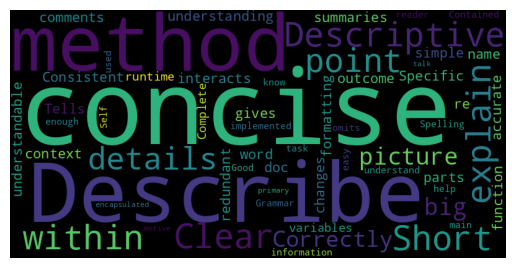

In [44]:
plt.figure()
plt.imshow(goodcloud)
plt.axis("off")
plt.show()


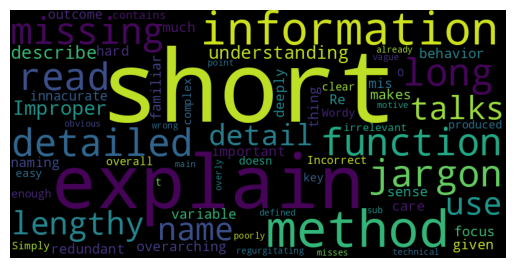

In [45]:
plt.figure()
plt.imshow(badcloud)
plt.axis("off")
plt.show()


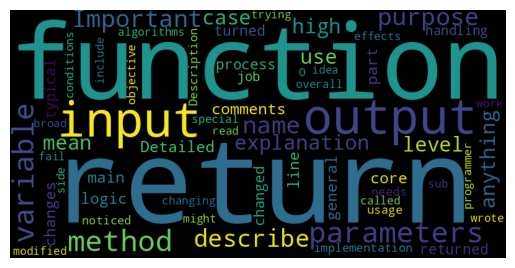

In [46]:
plt.figure()
plt.imshow(imcloud)
plt.axis("off")
plt.show()


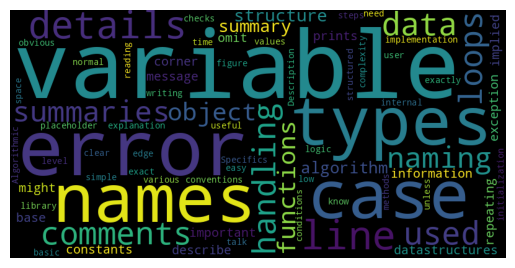

In [47]:
plt.figure()
plt.imshow(unimcloud)
plt.axis("off")
plt.show()


In [105]:
goodcloud.to_file("experienced_goodcloud.png")
badcloud.to_file("experiencede_badcloud.png")
imcloud.to_file("experienced_importantcloud.png")
unimcloud.to_file("experienced_unimportantcloud.png")